# CHAPTER 3
**CNN and RNN Using PyTorch**

In [1]:
import torch
import sklearn
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

torch.manual_seed(1)

EPOCH = 10
BATCH_SIZE = 64
LEARNING_RATE = 0.005
N_TEST_IMAGE = 5

## Recipe 3-11. Working with Autoencoders Problem
Unsupervised learning is a branch of machine learning that does not have a target column or the output is not defined.

In AutoEncoder architecture, the input feature space is transformed into a lower dimensional tensor representation using hidden layer and mapped back to the same input space. **The layer that is precisely in the middle holds the autoencoder’s values.**

In [2]:
train_data = torchvision.datasets.MNIST(
    root = 'data/',
    train = True,
    transform=torchvision.transforms.ToTensor()
)

train_loader = Data.DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE,
                               shuffle=True)

D:\Anaconda3\envs\pytorch\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64, 12),
            nn.Tanh(),
            nn.Linear(12, 3)
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()       # compress to a range (0, 1)
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

If we put the input data in the input layer and the same dataset in the output layer, then we add multiple layers of hidden layers with many neurons, and then we pass through a series of epochs. We get a set of latent features in the innermost hidden layer. The weights or parameters in the central hidden layer are known as the autoencoder layer.

In [4]:
autoencoder = AutoEncoder()
print(autoencoder)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LEARNING_RATE)
loss_fn = nn.MSELoss()

view_data = Variable(train_data.data[:N_TEST_IMAGE] \
                     .view(-1, 28 * 28) \
                     .type(torch.FloatTensor))


AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Tanh()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): Tanh()
    (6): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): Tanh()
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): Tanh()
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): Tanh()
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Sigmoid()
  )
)


## Recipe 3-12. Fine-Tuning Results Using Autoencoder

Conceptually, an autoencoder works the same as the clustering model. In unsupervised learning, the machine learns patterns from data and generalizes it to the new dataset.

epoch: 0 | step: 0 | train loss: 0.2330


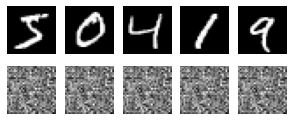

epoch: 0 | step: 500 | train loss: 0.0607


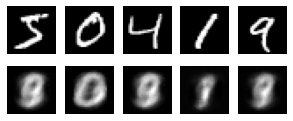

epoch: 0 | train loss: 0.0567


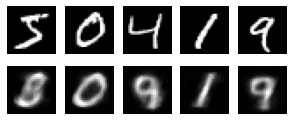

epoch: 1 | train loss: 0.0412


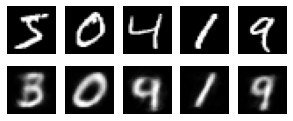

epoch: 2 | train loss: 0.0383


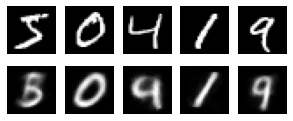

epoch: 3 | train loss: 0.0420


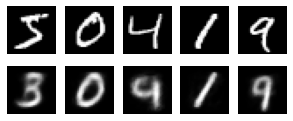

epoch: 4 | train loss: 0.0406


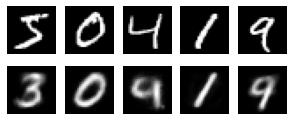

epoch: 5 | train loss: 0.0449


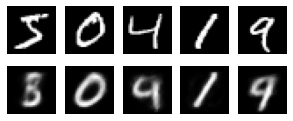

epoch: 6 | train loss: 0.0393


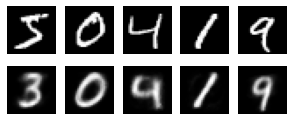

epoch: 7 | train loss: 0.0410


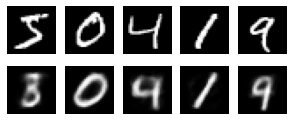

epoch: 8 | train loss: 0.0398


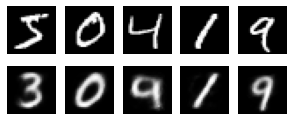

epoch: 9 | train loss: 0.0326


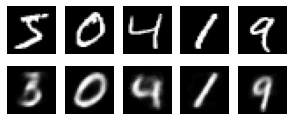

In [5]:
for epoch in range(EPOCH):
    for step, (x, y) in enumerate(train_loader):
        batch_x = Variable(x.view(-1, 28 * 28))
        batch_x_prim = Variable(x.view(-1, 28 * 28))
        batch_y = Variable(y)
        
        encoded, decoded = autoencoder(batch_x)
        
        loss = loss_fn(decoded, batch_x_prim)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch == 0 and step % 500 == 0:
            print("epoch: {} | step: {} | train loss: {:.4f}" \
                  .format(epoch, step, loss))
            _, decoded_view_data = autoencoder(view_data)
            fig, ax = plt.subplots(2, N_TEST_IMAGE, figsize=(5, 2))
            
            for i in range(N_TEST_IMAGE):
                ax[0][i].imshow(
                    np.reshape(view_data.detach().numpy()[i],(28, 28)), 
                    cmap='gray')
                ax[0][i].axis('off')
                ax[1][i].imshow(
                    np.reshape(decoded_view_data.detach().numpy()[i], (28, 28)),
                    cmap='gray')
                ax[1][i].axis('off')
            plt.show()

    print("epoch: {} | train loss: {:.4f}".format(epoch, loss))
    _, decoded_view_data = autoencoder(view_data)
    fig, ax = plt.subplots(2, N_TEST_IMAGE, figsize=(5, 2))

    for i in range(N_TEST_IMAGE):
        ax[0][i].imshow(
            np.reshape(view_data.detach().numpy()[i],(28, 28)),
            cmap='gray')
        ax[0][i].axis('off')
        ax[1][i].imshow(
            np.reshape(decoded_view_data.detach().numpy()[i],(28, 28)),
            cmap='gray')
        ax[1][i].axis('off')
    plt.show()

## Recipe 3-13. Visualizing the Encoded Data in a 3D Plot

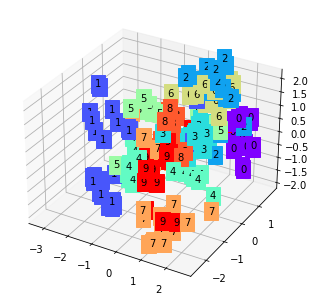

In [6]:
view_data = Variable(train_data.data[:200] \
                     .view(-1, 28 * 28) \
                     .type(torch.FloatTensor))
encoded_view_data, _ = autoencoder(view_data)
fig = plt.figure(2)
ax = Axes3D(fig)
# the inside encoder is 3-dim
X = encoded_view_data[:, 0].detach().numpy()
Y = encoded_view_data[:, 1].detach().numpy()
Z = encoded_view_data[:, 2].detach().numpy()
value = train_data.targets[:200].detach().numpy()
for x, y, z, s in zip(X, Y, Z, value):
    c = cm.rainbow(int(255 * s / 9))
    ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim([X.min(), X.max()])
ax.set_ylim([Y.min(), Y.max()])
ax.set_zlim([Z.min(), Z.max()])
plt.show()